The Branch-Bound Algorithm:

In [73]:
import networkx as nx
import time
start_time = time.time()

In [74]:
def complete_graph(G):
    is_complete = True
    for u in G.nodes():
        for v in G.nodes():
            if u != v and not G.has_edge(u, v):
                is_complete = False
                break
    return is_complete

In [75]:
def hole_graph(G):
    if not nx.is_connected(G):
        return False
    cycles = list(nx.cycle_basis(G))
    if len(cycles) == 1 and set(G.nodes()) == set(cycles[0]):
        return True
    return False

In [76]:
def isolated_examine(G, clique_nodes):
    new_graph = G.copy()
    edges_to_remove = [(u, v) for u, v in new_graph.edges() if u in clique_nodes and v in clique_nodes]
    new_graph.remove_edges_from(edges_to_remove)
    isolated_nodes = [node for node in clique_nodes if len(new_graph[node]) == 0]
    return isolated_nodes

In [77]:
def remove_clique_all(G, clique_nodes):
    new_graph = G.copy()
    edges_to_remove = [(u, v) for u, v in new_graph.edges() if u in clique_nodes or v in clique_nodes]
    new_graph.remove_edges_from(edges_to_remove)
    new_graph.remove_nodes_from(clique_nodes)
    return new_graph

In [78]:
def remove_clique(G, clique_nodes):
    new_graph = G.copy()
    edges_to_remove = [(u, v) for u, v in new_graph.edges() if u in clique_nodes and v in clique_nodes]
    new_graph.remove_edges_from(edges_to_remove)
    isolated_nodes = [node for node in clique_nodes if len(new_graph[node]) == 0]
    new_graph.remove_nodes_from(isolated_nodes)
    return new_graph

In [79]:
def graph_connected(G):
    return nx.is_connected(G)

In [80]:
def clique_cutset(G):
    all_cliques = list(nx.find_cliques(G))
    clique_cutset_num = 0
    isolated_num = 0
    sub_graph = G.copy()
    print("Isolated Clique-Cutset Nodes:")
    for clique_nodes in all_cliques:
        temp_graph = remove_clique(G, clique_nodes)
        if graph_connected(temp_graph)is False:
            sub_graph = remove_clique_all(sub_graph,clique_nodes)
            sub_isolated = isolated_examine(G, clique_nodes)
            clique_cutset_num += 1
            if len(sub_isolated) != 0:
                isolated_num += 1
                print(sub_isolated)
    if clique_cutset_num == 0:
        return False, None, None
    else:
        return True, sub_graph, isolated_num

In [81]:
G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5),(3,6),(6,7),(6,8),(6,9),(6,10),(7,8),(7,9),(7,10),(8,9),(8,10),(9,10)])
temp_situ,temp_graph,isolated_num = clique_cutset(G)

Isolated Clique-Cutset Nodes:
[4, 5]


In [82]:
def greedy_stable_set(graph):
    stable_set = set()
    for node in graph.nodes():
        if all(node not in stable_set and not graph.has_edge(node, neighbor) for neighbor in stable_set):
            stable_set.add(node)
    return stable_set

In [83]:
def subgraph_leaf(graph, isolated_num):
    if complete_graph(graph) and len(graph.nodes()) != 1:
        print("Isolated Complete Graph(>=2) Nodes:")
        print(graph.nodes())
        isolated_num += 1
    elif hole_graph(graph):
        print("Isolated Hole Graph Nodes:")
        print(greedy_stable_set(graph))
        isolated_num += len(greedy_stable_set(graph))
    elif complete_graph(graph) and len(graph.nodes()) == 1:
        print("Leaf Nodes:")
        print(graph.nodes())
        isolated_num += 1
    else:
        print("Other Subgraph Nodes:")
        print(greedy_stable_set(graph))
        isolated_num += len(greedy_stable_set(graph))
    return isolated_num       

In [84]:
connected_parts = list(nx.connected_components(temp_graph))
sub_graphs = [temp_graph.subgraph(i) for i in connected_parts]
for subgraph in sub_graphs:
    isolated_num = subgraph_leaf(subgraph,isolated_num)
print("Isolated Clique-Cutset Nodes:",temp_graph.nodes())
print("Size of the maximum independent set:", isolated_num)
end_time = time.time()
run_time = (end_time - start_time) * 1000
print("Running Time:", run_time, "ms")

Leaf Nodes:
[1]
Isolated Complete Graph(>=2) Nodes:
[7, 8, 9, 10]
Isolated Clique-Cutset Nodes: [1, 7, 8, 9, 10]
Size of the maximum independent set: 3
Running Time: 168.61462593078613 ms


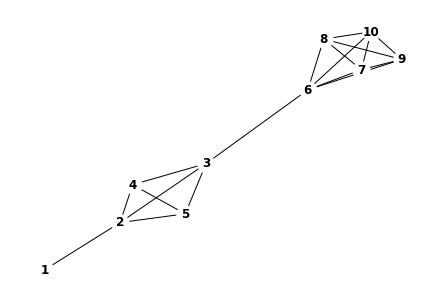

In [72]:
nx.draw(G, with_labels=True, font_weight='bold', node_color='white')